In [1]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
total_data = pd.read_csv("twitter_sentiment.csv", encoding="ISO-8859-1")

In [3]:
total_data.head()

,Unnamed: 0,Tweet Id,Tweet URL,Tweet Posted Time (UTC),TweetContent,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,...,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,sentiment,sentiment_n
0,0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,...,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50,negative,-1
1,1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: TrumpÃ¢ÂÂs press ...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,...,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17,positive,1
2,2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",...,mitchellvii,Host of YourVoiceÃ¢ÂÂ¢ America at http://your...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21,negative,-1
3,3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,...,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46,neutral,0
4,4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,...,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45,neutral,0


In [7]:
tweet = total_data.columns.values[4]
sentiment = total_data.columns.values[24]
tweet, sentiment

('TweetContent', 'sentiment_n')

In [9]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             
    tweet = re.sub('@[^\s]+', '', tweet)                             
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   
    tweet = re.sub(r"\d+", " ", str(tweet))                           
    tweet = re.sub('&quot;'," ", tweet)                               
    tweet = emoji(tweet)                                            
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                      
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         
    tweet = re.sub(r"\s+", " ", str(tweet))                            
    return tweet

with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

total_data['processed_tweet'] = np.vectorize(process_tweet)(total_data[tweet])

In [10]:
total_data.head()

,Unnamed: 0,Tweet Id,Tweet URL,Tweet Posted Time (UTC),TweetContent,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,...,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,sentiment,sentiment_n,processed_tweet
0,0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783175778304,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC,Tweet,Twitter for iPhone,0,0,NaN,...,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50,negative,-1,also the entire swiss football league is on hold postponing games from the professional and amateur level coronavirus
1,1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417742520332290,28 Feb 2020 15:44:40,"World Health Org Official: TrumpÃ¢ÂÂs press conference on #coronavirus Ã¢ÂÂincoherentÃ¢ÂÂ\nWorld Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says ""I found most of what [Trump] said incoherent.""\nhttps://t.co/v4WIBW9Fld",Tweet,Twitter Web App,0,0,Los Angeles CA USA,...,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activist Sean Brennan. LAM has toured the world &amp; influenced many artists.",Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17,positive,1,world health org official trumpã â â press conference on coronavirus ã â â incoherentã â â world health organization special adviser to the director dr ezekiel emanuel says found most of what trump said incoherent
2,2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417741027225602,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.\n\n#TDS",Tweet,Twitter Web App,23,64,"Miami, FL",...,"Host of YourVoiceÃ¢ÂÂ¢ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #Trump2020 #2ASupporter #TrustThePlan",Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21,negative,-1,mean liberals are cheer leading this coronavirus like it their high school football team tds
3,3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/1233417699264356357,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax. https://t.co/PFESx4ePpD",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,...,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly stopped being funny. (helenkennedy@gmail),Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46,neutral,0,under repeated questioning pompeo refuses to say the covid coronavirus is not hoax
4,4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274807808,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,...,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. Past president: @fccjapan, @SeoulFCC. Ex @AP, @Discovery. Ã°ÂÂÂ¡",Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45,neutral,0,coronavirus comments now from here


In [11]:
import nltk
nltk.download('wordnet')
tokenized_tweet = total_data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()


[nltk_data] Downloading package wordnet to C:\Users\thamarai kannan
[nltk_data]     p\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [also, the, entire, swiss, football, league, is, on, hold, postponing, game, from, the, professional, and, amateur, level, coronavirus]                                                                                                                  
1    [world, health, org, official, trumpã, â, â, press, conference, on, coronavirus, ã, â, â, incoherentã, â, â, world, health, organization, special, adviser, to, the, director, dr, ezekiel, emanuel, say, found, most, of, what, trump, said, incoherent]
2    [mean, liberal, are, cheer, leading, this, coronavirus, like, it, their, high, school, football, team, tds]                                                                                                                                              
3    [under, repeated, questioning, pompeo, refuse, to, say, the, covid, coronavirus, is, not, hoax]                                                                                                                                       

In [12]:
stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
             "you", "your", "yours", "yourself", "yourselves", "he", "him",
             "his", "himself", "she", "her", "hers", "herself", "it", "its",
             "itself", "they", "them", "their", "theirs", "themselves", "what",
             "which", "who", "whom", "this", "that", "these", "those", "am", "is",
             "are", "was", "were", "be", "been", "being", "have", "has", "had",
             "having", "do", "does", "did", "doing", "a", "an", "the", "and",
             "but", "if", "or", "because", "as", "until", "while", "of", "at",
             "by", "for", "with", "about", "against", "between", "into", "through",
             "during", "before", "after", "above", "below", "to", "from", "up",
             "down", "in", "out", "on", "off", "over", "under", "again", "further",
             "then", "once", "here", "there", "when", "where", "why", "how", "all",
             "any", "both", "each", "few", "more", "most", "other", "some", "such",
             "only", "own", "same", "so", "than", "too", "very",
             "can", "will", "just", "should", "now"}

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join([word for word in tokenized_tweet[i] if word not in stop_words])
tokenized_tweet.head()

0    also entire swiss football league hold postponing game professional amateur level coronavirus                                                                                                
1    world health org official trumpã â â press conference coronavirus ã â â incoherentã â â world health organization special adviser director dr ezekiel emanuel say found trump said incoherent
2    mean liberal cheer leading coronavirus like high school football team tds                                                                                                                    
3    repeated questioning pompeo refuse say covid coronavirus not hoax                                                                                                                            
4    coronavirus comment                                                                                                                                                                          
Name: processed_tweet, dt

In [14]:
total_data['processed_tweet'] = tokenized_tweet
total_data.head()

,Unnamed: 0,Tweet Id,Tweet URL,Tweet Posted Time (UTC),TweetContent,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,...,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,sentiment,sentiment_n,processed_tweet
0,0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783175778304,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC,Tweet,Twitter for iPhone,0,0,NaN,...,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50,negative,-1,also entire swiss football league hold postponing game professional amateur level coronavirus
1,1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417742520332290,28 Feb 2020 15:44:40,"World Health Org Official: TrumpÃ¢ÂÂs press conference on #coronavirus Ã¢ÂÂincoherentÃ¢ÂÂ\nWorld Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says ""I found most of what [Trump] said incoherent.""\nhttps://t.co/v4WIBW9Fld",Tweet,Twitter Web App,0,0,Los Angeles CA USA,...,"London After Midnight is a music project by writer, #vegan, political &amp; animal rights activist Sean Brennan. LAM has toured the world &amp; influenced many artists.",Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17,positive,1,world health org official trumpã â â press conference coronavirus ã â â incoherentã â â world health organization special adviser director dr ezekiel emanuel say found trump said incoherent
2,2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417741027225602,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.\n\n#TDS",Tweet,Twitter Web App,23,64,"Miami, FL",...,"Host of YourVoiceÃ¢ÂÂ¢ America at http://yourvoiceamerica.tv, Mon-Frid 10am ET #TrustTrump #MAGA #Trump2020 #2ASupporter #TrustThePlan",Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21,negative,-1,mean liberal cheer leading coronavirus like high school football team tds
3,3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/1233417699264356357,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax. https://t.co/PFESx4ePpD",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,...,Newspaperman (ex NY Daily News &amp; Boston Herald). I had a Trump joke here but it suddenly stopped being funny. (helenkennedy@gmail),Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46,neutral,0,repeated questioning pompeo refuse say covid coronavirus not hoax
4,4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274807808,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,...,"@WhiteHouse bureau chief @VOANews. Member: @aaja, @opcofamerica, @pressclubdc, @sajahq, @whca. Past president: @fccjapan, @SeoulFCC. Ex @AP, @Discovery. Ã°ÂÂÂ¡",Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45,neutral,0,coronavirus comment


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    
final_vectorized_data = count_vectorizer.fit_transform(total_data['processed_tweet'])  
final_vectorized_data

<60160x276728 sparse matrix of type '<class 'numpy.int64'>'
	with 2436947 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data[sentiment],
                                                    test_size=0.2, random_state=69)
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (48128, 276728)
X_test_shape :  (12032, 276728)
y_train_shape :  (48128,)
y_test_shape :  (12032,)


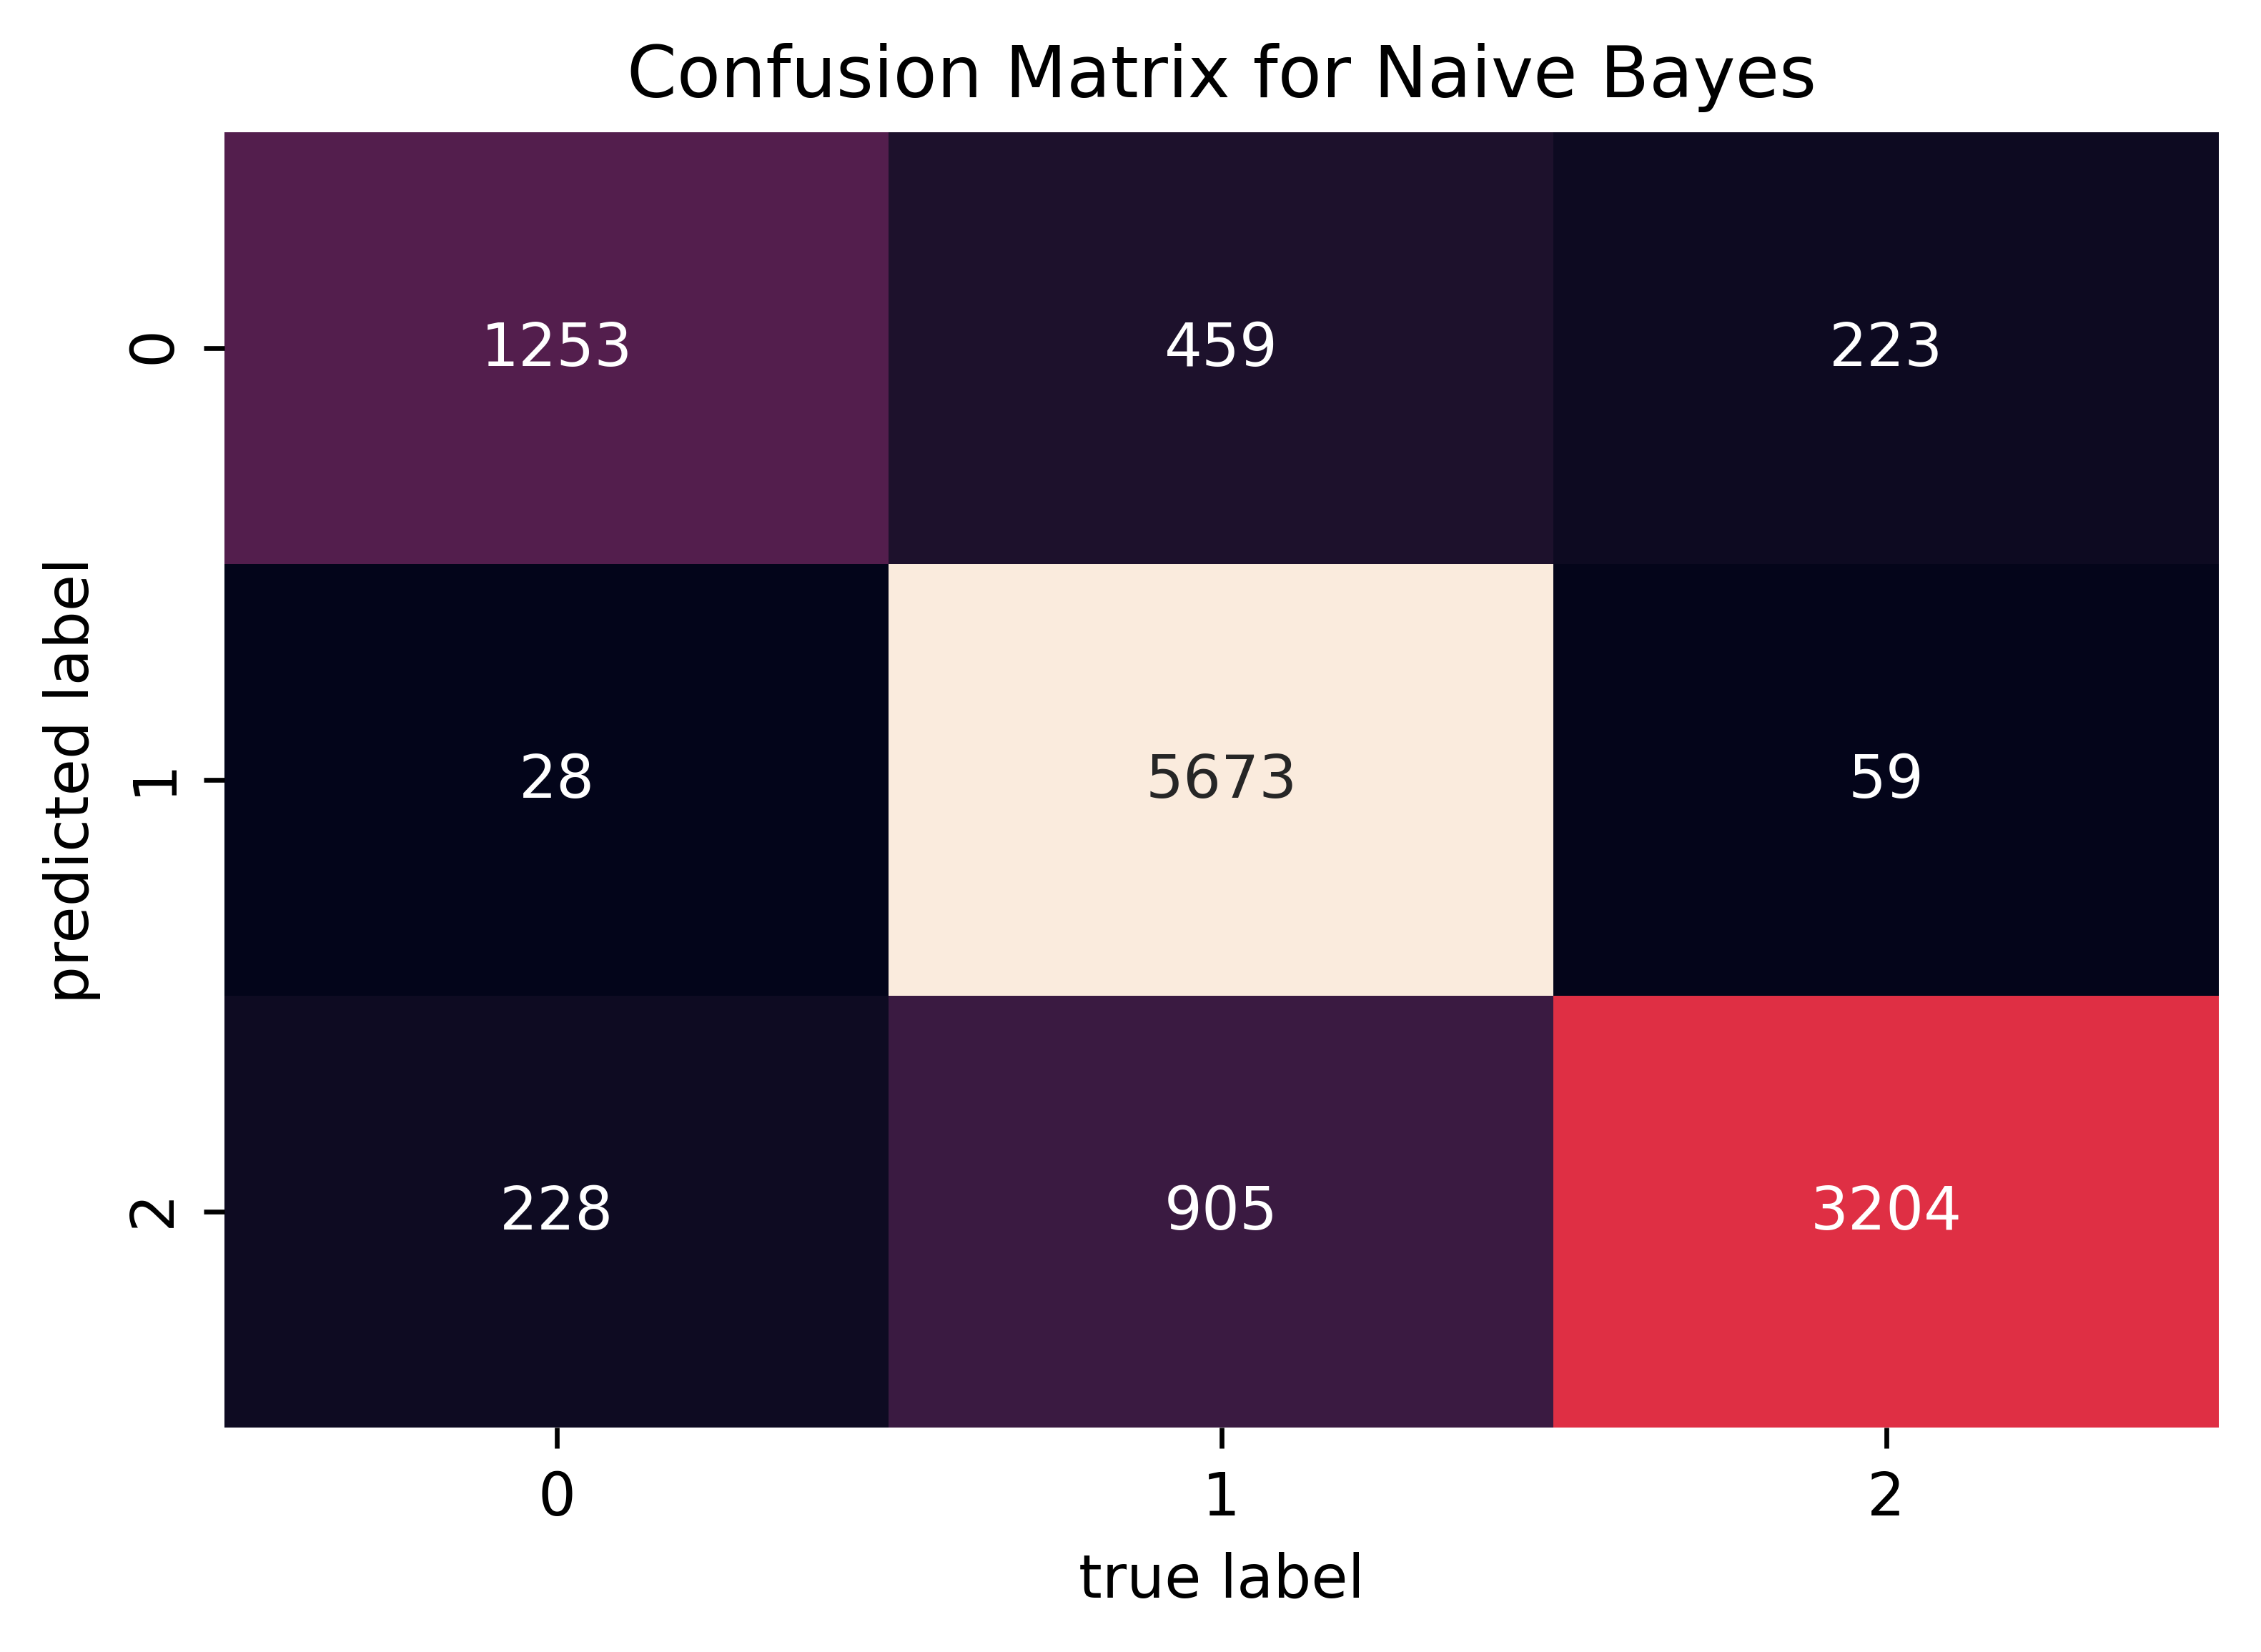

In [17]:
from sklearn.naive_bayes import MultinomialNB  

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8419215425531915


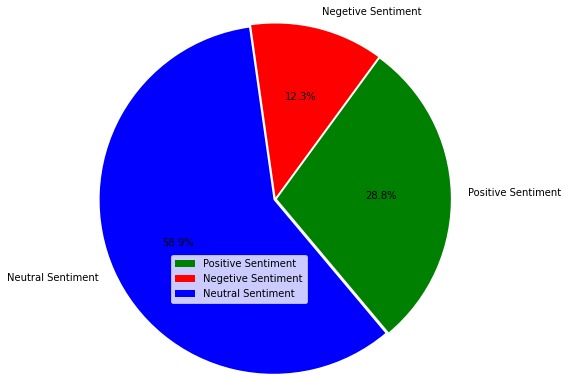

In [72]:
sentiments = ['Positive Sentiment', 'Negetive Sentiment','Neutral Sentiment'] 
slices = [(total_data['sentiment'] == 'positive').sum(), (total_data['sentiment'] == 'negative').sum(),(total_data['sentiment'] == 'neutral').sum()] 
colors = ['g', 'r','b'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=310, shadow = False,
        explode = (0.02,0.02,0.02), radius = 2, autopct = '%1.1f%%') 
plt.legend()
plt.show()

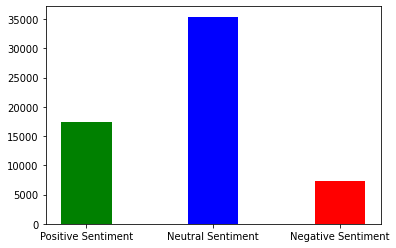

In [67]:
p=(total_data['sentiment'] == 'positive').sum()
ne=(total_data['sentiment'] == 'negative').sum()
nu=(total_data['sentiment'] == 'neutral').sum()
sentiment=[p,nu,ne]
colors = ['g', 'b','r']
slices = ['Positive Sentiment', 'Neutral Sentiment','Negative Sentiment'] 
plt.bar(slices,sentiment,color=colors,width=0.4) 
plt.show()

<Figure size 3600x2400 with 0 Axes>

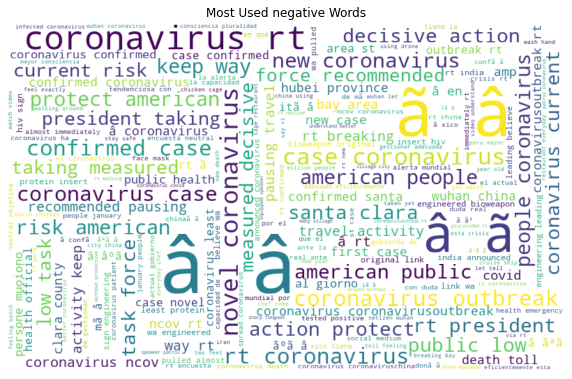

In [51]:
positive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used negative Words")
plt.show()

<Figure size 3600x2400 with 0 Axes>

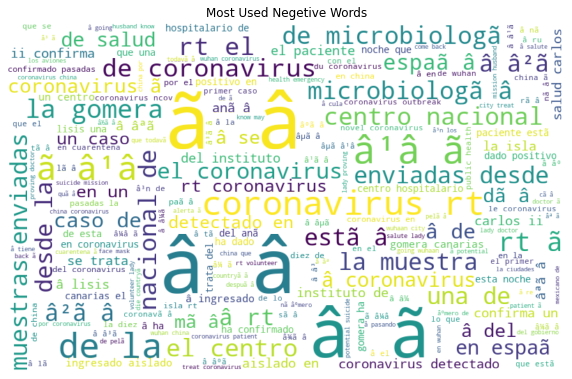

In [52]:
negetive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.show()